### 6. Batch Normalization 
Paper: https://arxiv.org/pdf/1502.03167.pdf  
Soluciona el problema de la "Covariate Shift" acelerando el entrenamiento y nos da de regalo regularización  

Paper efecto regularizador: 

https://arxiv.org/abs/1809.00846

Paper de le interferencia entre dropout y batchnormalization:  
https://arxiv.org/abs/1801.05134

![images/batch_norm.webp](images/batch_norm.webp)

$\beta$ reemplaza al bias, por lo que puede usarse en la capa densa:
use_bias=False

En el momento de testing, se usa una promediación sobre todos los batches de los $\mu_B$ y $\sigma^2_B$ (Exponential Weighted Average)

In [1]:
import numpy as np
import reg_helper as RHelper
import draw_nn
from matplotlib import pyplot as plt 
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

Using TensorFlow backend.


<Figure size 2000x600 with 2 Axes>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras import optimizers
from fnn_helper import PlotLosses

In [6]:
hidden_units = 20
input_shape = 2
output_size = 1

In [8]:
# Con BatchNormalization
model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.summary()

lr = 0.001 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                60        
_________________________________________________________________
batch_normalization_5 (Batch (None, 20)                80        
_________________________________________________________________
activation_7 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 20        
_________________________________________________________________
batch_normalization_6 (Batch (None, 1)                 4         
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 164
Trainable params: 122
Non-trainable params: 42
_________________________________________________________________


In [93]:
# sin BatchNormalization
model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape))
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size))
model_bn.add(Activation('sigmoid'))
model_bn.summary()

lr = 0.1 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 20)                60        
_________________________________________________________________
activation_46 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_47 (Activation)   (None, 1)                 0         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [94]:
# decay = 0.001 
batch_size = 59 
epochs = 4000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_bn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

- Cuales son los non-trainable parameters?
- Donde va la capa de batch normalization?

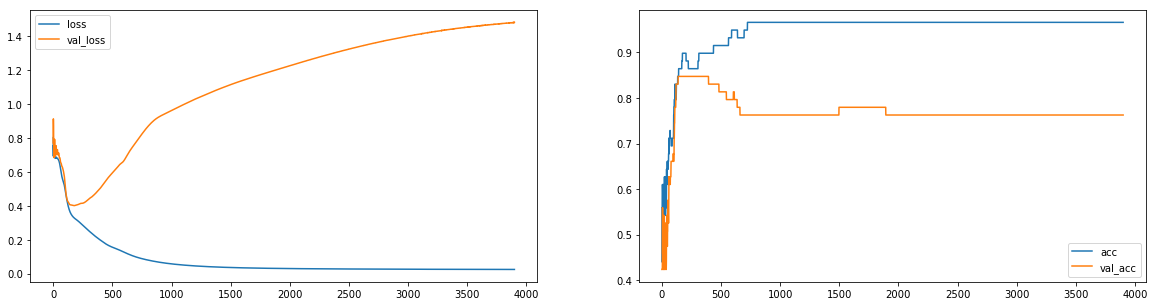

In [95]:
plot_losses_bn = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)
model_bn.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_bn],
         )

59/59 [==============================] - 0s 40us/step


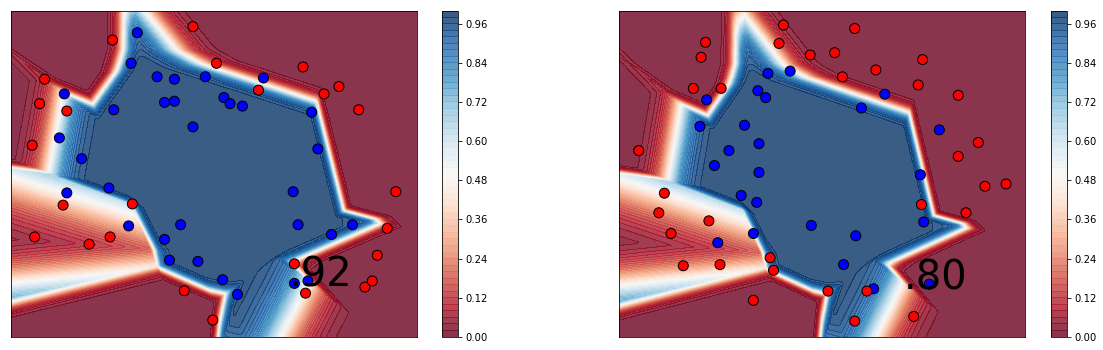

In [91]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_bn.evaluate(X_train, y_train)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_bn.evaluate(X_test, y_test)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

### Se puede ver que tiene un efecto de regularización sobre los pesos

In [70]:
# Para calcular norma en cada epoch
def get_weights_array(ws):
    weights_norm = []
    for weights in ws:
        weights_norm.append(np.linalg.norm(weights[0]))
    return weights_norm

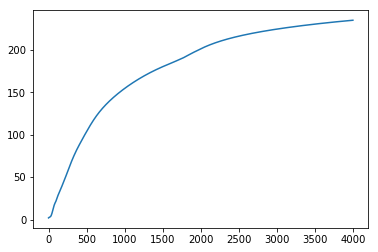

In [71]:
weights_l1 = get_weights_array(plot_losses_bn.weights)
plt.plot(weights_l1)
plt.show()

[Discución interesante](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)